## 1. Setup

In [1]:
import sys
sys.path.append('..')

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os
import shutil
import warnings

from utils.data.annotations import *
from utils.data.density_maps import create_and_save_density_maps
from utils.data.data_ops import move_val_split_to_train
from utils.input_output.io import save_np_arrays, load_np_arrays, load_images
from utils.input_output.io import save_gt_counts, load_gt_counts
from utils.preprocessing.misc import gaussian_smoothing

In [3]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

warnings.filterwarnings('ignore')

## 2. Datasets

### 2.1 CARPK Dataset

In [4]:
DATASET_PATH = '../datasets/carpk'
TRAIN_PATH = f'{DATASET_PATH}/train'
TRAIN_IMG_PATH = f'{TRAIN_PATH}/images'
TRAIN_GT_BBS_PATH = f'{TRAIN_PATH}/gt_bbs'
TRAIN_GT_DOTS_PATH = f'{TRAIN_PATH}/gt_dots'
TRAIN_GT_COUNTS_PATH = f'{TRAIN_PATH}/gt_counts'
TRAIN_GT_DENSITY_MAPS_PATH = f'{TRAIN_PATH}/gt_density_maps'
TRAIN_BBS_IMAGES_PATH = f'{DATASET_PATH}/initial/BBoxes'

VAL_PATH = f'{DATASET_PATH}/val'

TEST_PATH = f'{DATASET_PATH}/test'
TEST_IMG_PATH = f'{TEST_PATH}/images'
TEST_GT_BBS_PATH = f'{TEST_PATH}/gt_bbs'
TEST_GT_DOTS_PATH = f'{TEST_PATH}/gt_dots'
TEST_GT_COUNTS_PATH = f'{TEST_PATH}/gt_counts'
TEST_GT_DENSITY_MAPS_PATH = f'{TEST_PATH}/gt_density_maps'

# data splitting (initial train and test)
IMAGES_PATH = f'{DATASET_PATH}/initial/Images'
BBS_PATH = f'{DATASET_PATH}/initial/Annotations'
TRAIN_LIST_PATH = f'{DATASET_PATH}/initial/ImageSets/train.txt'
TEST_LIST_PATH = f'{DATASET_PATH}/initial/ImageSets/test.txt'

In [5]:
print(DATASET_PATH)
print(os.listdir(DATASET_PATH))

../datasets/carpk
['initial', 'test', 'train', 'val']


In [6]:
print(TRAIN_PATH)
print(os.listdir(TRAIN_PATH))

../datasets/carpk/train
['gt_bbs', 'gt_counts', 'gt_density_maps', 'gt_density_maps_aug', 'gt_dots', 'images', 'images_aug']


#### Load some train images and density maps

In [7]:
train_img_names = ['20161030_GF2_00150.png', '20161029_NTU_00117.png', '20161029_NTU_00022.png']
train_images = load_images(TRAIN_IMG_PATH, train_img_names, num_images=len(train_img_names))
print(len(train_images))
print(train_images[0].dtype)

3
float64


#### Load dots images (.png)

In [8]:
train_dots_images = load_dots_images(TRAIN_GT_DOTS_PATH, train_img_names)

print(len(train_dots_images), train_dots_images[0].shape, train_dots_images[0].dtype,
      train_dots_images[0].min(), train_dots_images[0].max(), train_dots_images[0].sum())

3 (720, 1280) float64 0.0 1.0 59.0


#### Create density maps (sigma=10)

In [9]:
SIGMA = 10
train_gt_density_maps = []
for dots_img in train_dots_images:
    density_map = gaussian_smoothing([dots_img], sigma=SIGMA)
    train_gt_density_maps.append(density_map[0])

In [10]:
print(train_gt_density_maps[0].shape)

(720, 1280)


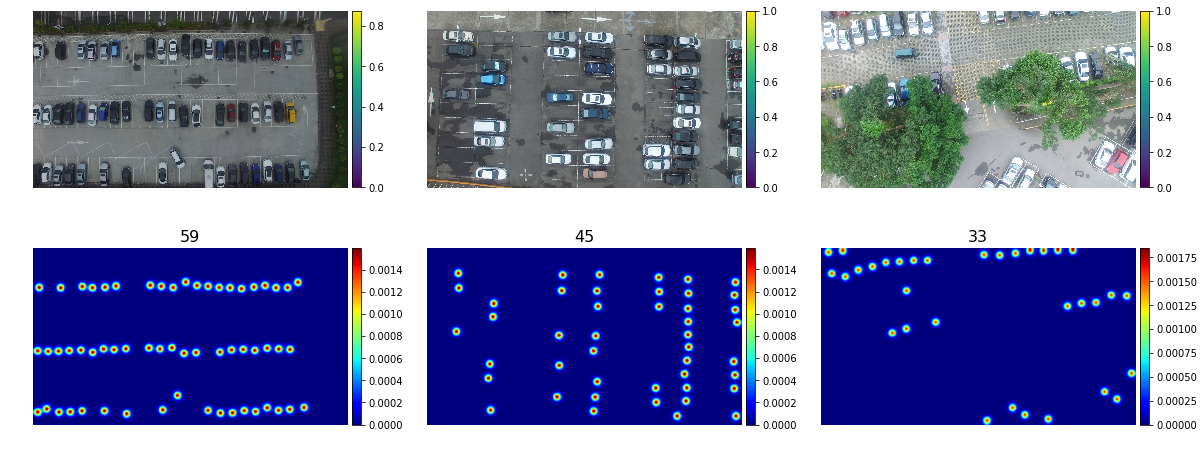

In [16]:
ROWS = 2
COLS = 3
fontsize = 16
fraction = 0.0269
pad = 0.015

plt.figure(figsize=(20, 8))
plt.title('CARPK Dataset')

for j in range(COLS):    
    plt.subplot(ROWS, COLS, j + 1)
    plt.imshow(train_images[j])
    plt.colorbar(fraction=fraction, pad=pad)
    plt.axis('off')
    
    plt.subplot(ROWS, COLS, COLS + j + 1)
    title = f'{train_gt_density_maps[j].sum():.0f}'
    plt.title(title, fontsize=fontsize)
    plt.imshow(train_gt_density_maps[j], cmap='jet')
    plt.colorbar(fraction=fraction, pad=pad)
    plt.axis('off')

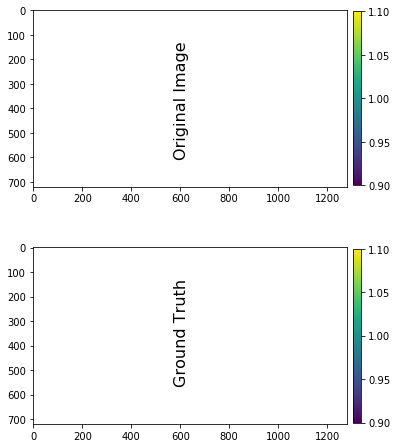

In [12]:
plt.figure(figsize=(20, 8))
plt.subplot(2, 3, 1)
plt.title(f'Original Image\n', fontsize=fontsize, loc='center', rotation=90, pad=-60)
plt.imshow(np.ones_like(train_images[0]))
plt.colorbar(fraction=fraction, pad=pad)

plt.subplot(2, 3, 4)
plt.title(f'Ground Truth\n', fontsize=fontsize, loc='center', rotation=90, pad=-60)
plt.imshow(np.ones_like(train_images[0]))
plt.colorbar(fraction=fraction, pad=pad)
plt.show()